# Data Loading

In [1]:
path1 = "Dataset/gauravduttakiit/banknote/versions/1"

print("Path to dataset files:", path1)


TRAIN_PATH = path1 + "/train.csv"
TEST_PATH = path1 + "/test.csv"

Path to dataset files: Dataset/gauravduttakiit/banknote/versions/1


In [631]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [9]:
df = pd.read_csv(TRAIN_PATH)

df.head()

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


In [8]:
df.describe()

,VWTI,SWTI,CWTI,EI,Class
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.448500,1.780643,1.493533,-1.157454,0.445255
std,2.852623,5.922621,4.375655,2.084983,0.497221
min,-7.036400,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.790850,-2.125200,-1.574975,-2.246975,0.000000
50%,0.540430,2.205850,0.671900,-0.569190,0.000000
75%,2.835350,6.793925,3.574450,0.399980,1.000000
max,6.563300,12.730200,17.927400,2.449500,1.000000


# Базовая модель

Целевой таргет

In [12]:
X = df.drop(columns=['Class'])
y = df['Class']

Разделяем на траин и тест

In [577]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [459]:
X_train

,VWTI,SWTI,CWTI,EI
2,-3.94110,-12.8792,13.0597,-3.312500
6,-2.29870,-5.2270,5.6300,0.917220
590,4.60140,5.6264,-2.1235,0.193090
634,2.77440,6.8576,-1.0671,0.075416
842,-1.60010,-9.5828,9.4044,0.081882
...,...,...,...,...
330,0.56953,7.6294,1.5754,-3.223300
466,-2.77230,3.2777,-0.9351,-3.145700
121,5.02140,8.0764,-3.0515,-1.715500
1044,-1.13060,1.8458,-1.3575,-1.380600


In [460]:
X_valid

,VWTI,SWTI,CWTI,EI
44,-1.70640,3.30880,-2.28290,-2.19780
568,-1.38850,12.50260,0.69118,-7.54870
56,0.95626,2.47280,4.45780,0.21636
636,-0.49241,0.89392,-1.62830,-0.56854
486,-0.34890,3.19290,-3.40540,-3.18320
...,...,...,...,...
757,2.61040,8.00810,-0.23592,-1.76080
713,-0.24745,1.93680,-2.46970,-0.80518
365,-6.36790,8.01020,0.42470,-3.22070
299,-1.16670,-1.42370,2.92410,0.66119


Базовая модель

In [461]:
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

y_pred_base = baseline_model.predict(X_valid)

Метрики

In [462]:
acc = accuracy_score(y_valid, y_pred_base)
prec = precision_score(y_valid, y_pred_base)
rec = recall_score(y_valid, y_pred_base)

In [463]:
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)

Accuracy: 0.9818181818181818
Precision: 0.9655172413793104
Recall: 0.9882352941176471


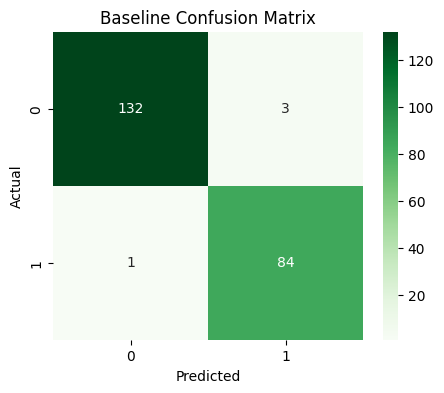

In [464]:
cm = confusion_matrix(y_valid, y_pred_base)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Baseline Confusion Matrix')
plt.show()

Видим что модель ошиблась лишь 4 раза

Сделаем разделение на train, test с параметром stratify

In [477]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df["Class"])

In [557]:
improved_model = LogisticRegression(max_iter=100, solver='newton-cg', C=2123.90, penalty='l2'
                                   )
improved_model.fit(X_train, y_train)
y_pred_imp = improved_model.predict(X_valid)

In [558]:
acc2 = accuracy_score(y_valid, y_pred_imp)
prec2 = precision_score(y_valid, y_pred_imp)
rec2 = recall_score(y_valid, y_pred_imp)

In [559]:
print("Accuracy:", acc2)
print("Precision:", prec2)
print("Recall:", rec2)

Accuracy: 0.990909090909091
Precision: 0.9897959183673469
Recall: 0.9897959183673469


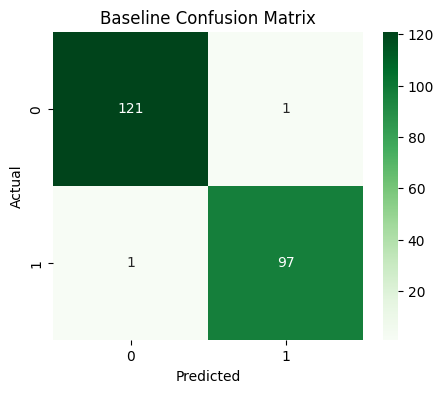

In [560]:
cm2 = confusion_matrix(y_valid, y_pred_imp)
plt.figure(figsize=(5,4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Baseline Confusion Matrix')
plt.show()

Результат улучшился

Все 3 использованные метрики стали ближе к 1.0

# Реализация LogisticRegression

In [578]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Logistic regression class
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=5000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        # Добавляем столбец с единицами для bias (intercept)
        X = np.c_[np.ones((X.shape[0], 1)), X]
        self.weights = np.zeros(X.shape[1])
        
        # Градиентный спуск
        for _ in range(self.epochs):
            z = X.dot(self.weights)
            predictions = sigmoid(z)
            gradient = X.T.dot(predictions - y) / len(y)
            self.weights -= self.lr * gradient

    def predict_proba(self, X):
        # Добавляем столбец с единицами для bias (intercept)
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return sigmoid(X.dot(self.weights))

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)



In [579]:
X_train_np = X_train.values
y_train_np = y_train.values
X_valid_np = X_valid.values


torch_model = LogisticRegressionScratch(lr=0.01, epochs=8000)
torch_model.fit(X_train_np, y_train_np)


y_pred_scratch = torch_model.predict(X_valid_np)

In [580]:
acc_s = accuracy_score(y_valid, y_pred_scratch)
prec_s = precision_score(y_valid, y_pred_scratch)
rec_s = recall_score(y_valid, y_pred_scratch)

In [581]:
print("Accuracy:", acc_s)
print("Precision:", prec_s)
print("Recall:", rec_s)

Accuracy: 0.9818181818181818
Precision: 0.9655172413793104
Recall: 0.9882352941176471


Сравнение

In [586]:
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)

print("\n")
print("\n")

print("Accuracy:", acc2)
print("Precision:", prec2)
print("Recall:", rec2)

print("\n")
print("\n")

print("Accuracy:", acc_s)
print("Precision:", prec_s)
print("Recall:", rec_s)

Accuracy: 0.9818181818181818
Precision: 0.9655172413793104
Recall: 0.9882352941176471




Accuracy: 0.990909090909091
Precision: 0.9897959183673469
Recall: 0.9897959183673469




Accuracy: 0.9818181818181818
Precision: 0.9655172413793104
Recall: 0.9882352941176471


In [ ]:
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)

# Data Loading and analisis Linear Regression

In [587]:
DATA_PATH = "Dataset/Water/water_consumption.csv"

In [639]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [589]:
df = pd.read_csv(DATA_PATH)

In [592]:
df.head()

,Country,Year,Total Water Consumption (Billion Cubic Meters),Per Capita Water Use (Liters per Day),Agricultural Water Use (%),Industrial Water Use (%),Household Water Use (%),Rainfall Impact (Annual Precipitation in mm),Groundwater Depletion Rate (%),Water Scarcity Level
0,Argentina,2000,481.490000,235.431429,48.550000,20.844286,30.100000,1288.698571,3.255714,Moderate
1,Argentina,2001,455.063000,299.551000,48.465000,26.943000,22.550000,1371.729000,3.120000,Moderate
2,Argentina,2002,482.749231,340.124615,50.375385,29.042308,23.349231,1590.305385,2.733846,Moderate
3,Argentina,2003,452.660000,326.756667,49.086667,30.476000,24.440000,1816.012667,2.708000,Moderate
4,Argentina,2004,634.566000,230.346000,38.670000,36.670000,23.924000,815.998000,1.902000,Moderate


In [593]:
df = df.rename(columns={
"Country": "country",
"Year": "year",
"Total Water Consumption (Billion Cubic Meters)": "total_consumption",
"Per Capita Water Use (Liters per Day)": "per_capita_use",
"Agricultural Water Use (%)": "agricultural_use",
"Industrial Water Use (%)": "industrial_use",
"Household Water Use (%)": "household_use",
"Rainfall Impact (Annual Precipitation in mm)": "rainfall",
"Groundwater Depletion Rate (%)": "groundwater_depletion",
"Water Scarcity Level": "scarcity_level"
})

In [594]:
df.head()

,country,year,total_consumption,per_capita_use,agricultural_use,industrial_use,household_use,rainfall,groundwater_depletion,scarcity_level
0,Argentina,2000,481.490000,235.431429,48.550000,20.844286,30.100000,1288.698571,3.255714,Moderate
1,Argentina,2001,455.063000,299.551000,48.465000,26.943000,22.550000,1371.729000,3.120000,Moderate
2,Argentina,2002,482.749231,340.124615,50.375385,29.042308,23.349231,1590.305385,2.733846,Moderate
3,Argentina,2003,452.660000,326.756667,49.086667,30.476000,24.440000,1816.012667,2.708000,Moderate
4,Argentina,2004,634.566000,230.346000,38.670000,36.670000,23.924000,815.998000,1.902000,Moderate


In [596]:
df.isnull().sum()

country                  0
year                     0
total_consumption        0
per_capita_use           0
agricultural_use         0
industrial_use           0
household_use            0
rainfall                 0
groundwater_depletion    0
scarcity_level           0
dtype: int64

plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Обучение и тест модели LinearRegression

Разделение на тест и треин

In [599]:
df_sorted = df.sort_values('year')
train = df_sorted[df_sorted.year < df_sorted.year.max() - 2]
valid = df_sorted[df_sorted.year >= df_sorted.year.max() - 2]

Наша фича таргет

In [600]:
X_train = train.drop(columns=['total_consumption'])
y_train = train['total_consumption']
X_valid = valid.drop(columns=['total_consumption'])
y_valid = valid['total_consumption']

Признаки

In [601]:
numeric_features = X_train.select_dtypes(include=[np.number]).columns
categorical_features = X_train.select_dtypes(include=[object]).columns

Onehot encoding + базовая модель

In [646]:
baseline_preprocessor = ColumnTransformer([
("onehot", OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')


baseline_model = Pipeline([
("prep", baseline_preprocessor),
("lin", LinearRegression())
])

In [647]:
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_valid)

Метрики

In [648]:
mae_base = mean_absolute_error(y_valid, y_pred_base)
rmse_base = np.sqrt(mean_squared_error(y_valid, y_pred_base))
mean_val = y_valid.mean()
mae_percent_base = mae_base / mean_val * 100

In [649]:
print("MAE:", mae_base)
print("RMSE:", rmse_base)
print("MAE%:", mae_percent_base)

MAE: 121.8995435821052
RMSE: 153.18963143539293
MAE%: 29.085380326081626


# Улучшенная модель на основе гипотез

1. Изменить гиперпараметры 

2. Регуляризация

Начнем с регуляризации

Буду использовать регуляризацию L2

In [651]:
baseline_preprocessor = ColumnTransformer([
("onehot", OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')


baseline_model = Pipeline([
("prep", baseline_preprocessor),
("lin", Ridge())
])

In [652]:
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_valid)

In [653]:
mae_base = mean_absolute_error(y_valid, y_pred_base)
rmse_base = np.sqrt(mean_squared_error(y_valid, y_pred_base))
mean_val = y_valid.mean()
mae_percent_base = mae_base / mean_val * 100

In [654]:
print("MAE:", mae_base)
print("RMSE:", rmse_base)
print("MAE%:", mae_percent_base)

MAE: 69.6266429001102
RMSE: 112.34624012787962
MAE%: 16.613002231743078


Результаты стали лучше

In [616]:
country_results = []
countries = df['country'].unique()

In [619]:
countries

array(['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France',
       'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico',
       'Russia', 'Saudi Arabia', 'South Africa', 'South Korea', 'Spain',
       'Turkey', 'UK', 'USA'], dtype=object)

# Реализация Линейной регрессии

In [666]:
class LinearRegressionScratch:
    def __init__(self, lr=0.001, epochs=50000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        self.weights = np.zeros(X.shape[1])

        for _ in range(self.epochs):
            predictions = X.dot(self.weights)
            errors = predictions - y
            gradient = X.T.dot(errors) / len(y)
            self.weights -= self.lr * gradient

    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return X.dot(self.weights)


In [667]:
X_train_np = X_train.select_dtypes(include=[np.number]).values
y_train_np = y_train.values
X_valid_np = X_valid.select_dtypes(include=[np.number]).values
y_valid_np = y_valid.values

In [668]:
scratch_model = LinearRegressionScratch(lr=0.00001, epochs=20000)
scratch_model.fit(X_train_np, y_train_np)
y_pred_scratch = scratch_model.predict(X_valid_np)

C:\Users\Minidrak\AppData\Local\Temp\ipykernel_16192\1115990980.py:14: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.lr * gradient


In [669]:
mae_s = mean_absolute_error(y_valid_np, y_pred_scratch)
rmse_s = np.sqrt(mean_squared_error(y_valid_np, y_pred_scratch))
r2_s = r2_score(y_valid_np, y_pred_scratch)

ValueError: Input contains NaN.